# Maximum Conditional Mean Discrepancy (MCMD)
From Park and Muandet 2020, maximum conditional mean discrepancy (MCMD)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def gaussian_kernel(diff: np.ndarray, sigma: float = 0.1) -> float:
    return np.exp(-0.5 * sigma * diff**2)

In [3]:
def get_k_z(Z, z):
    n = len(Z)
    k_z = np.zeros((n, 1))
    for i in range(n):
        k_z[i, 0] = gaussian_kernel(Z[i], z)
    return k_z

In [4]:

from functools import partial

def conditional_mcmd(z: np.ndarray, X: np.ndarray, Z: np.ndarray, X_prime: np.ndarray, Z_prime: np.ndarray, lmbda: float = 0.01, sigma: float = 0.1) -> float:
    
    k = partial(gaussian_kernel, sigma=sigma)
    n = len(Z)
    m = len(Z_prime)

    K_Z = k(Z.reshape(-1, 1) - Z.reshape(1, -1))
    K_Z_prime = k(Z_prime.reshape(-1, 1) - Z_prime.reshape(1, -1))

    W_Z = np.linalg.inv(K_Z + n * lmbda * np.eye(n))
    W_Z_prime = np.linalg.inv(K_Z_prime + m * lmbda * np.eye(m))

    K_X = k(X.reshape(-1, 1) - X.reshape(1, -1))
    K_X_prime = k(X_prime.reshape(-1, 1) - X_prime.reshape(1, -1))
    K_X_X_prime = k(X.reshape(-1, 1) - X_prime.reshape(1, -1))
    
    k_Z = k(Z - z)
    k_Z_prime = k(Z_prime - z)

    first_term = k_Z.T @ W_Z @ K_X @ W_Z.T @ k_Z
    second_term = 2*k_Z.T @ W_Z @ K_X_X_prime @ W_Z_prime.T @ k_Z_prime
    third_term = k_Z_prime.T @ W_Z_prime @ K_X_prime @ W_Z_prime.T @ k_Z_prime

    return first_term - second_term + third_term

## Experiment 1

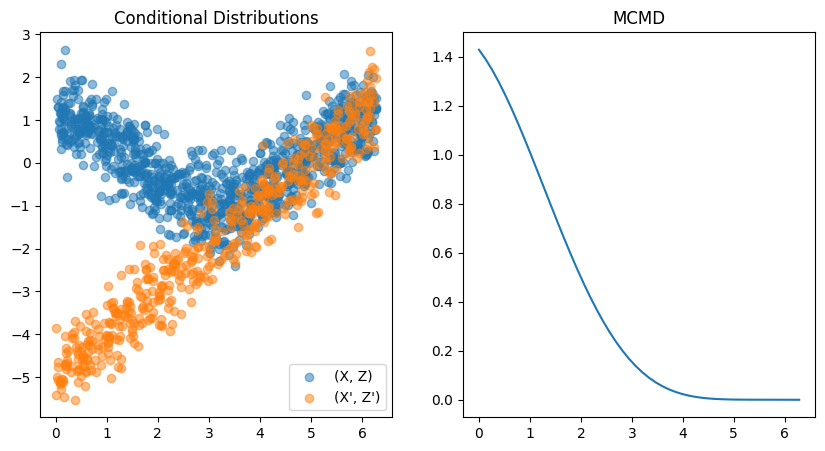

In [5]:
n = 1000
m = 500
z = np.random.uniform(0, 2*np.pi, size=n)
x = np.random.normal(loc=np.cos(z), scale=0.5)


z_prime = np.random.uniform(0, 2*np.pi, size=m)
x_prime = np.random.normal(loc=(z_prime - 5), scale=0.5)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title("Conditional Distributions")
axs[0].scatter(z, x, alpha=0.5, label="(X, Z)")
axs[0].scatter(z_prime, x_prime, alpha=0.5, label="(X', Z')")
axs[0].legend()

zvals = np.linspace(0, 2*np.pi)
mcmd = [conditional_mcmd(zval, x, z, x_prime, z_prime) for zval in zvals]

axs[1].set_title("MCMD")
axs[1].plot(zvals, mcmd)
plt.show()

## Experiment 2
Reproduce Park and Muandet 2020 Figure 2

### Generate data

In [6]:
n = m = 500
Z = np.random.normal(0, 1, size=n)
Z_prime = np.random.normal(0, 1, size=m)

In [7]:
X = np.exp(-0.5 * np.power(Z, 2)) * np.sin(2*Z) + 0.3 * np.random.normal(0, 1, size=n)
X_same = np.exp(-0.5 * np.power(Z_prime, 2)) * np.sin(2*Z_prime) + 0.3 * np.random.normal(0, 1, size=n)
X_diff = Z_prime + 0.3 * np.random.normal(0, 1, size=n)

In [8]:
zvals = np.linspace(-3, 3, 100)

### Compute MCMD

In [9]:
lmbda = 5e-4
sig=0.1

In [10]:
mcmd_same = [conditional_mcmd(z=zval, X=X, Z=Z, Z_prime=Z_prime, X_prime=X_same, lmbda=lmbda, sigma=sig) for zval in zvals]

In [11]:
mcmd_diff = [conditional_mcmd(z=zval, X=X, Z=Z, Z_prime=Z_prime, X_prime=X_diff, lmbda=lmbda, sigma=sig) for zval in zvals]

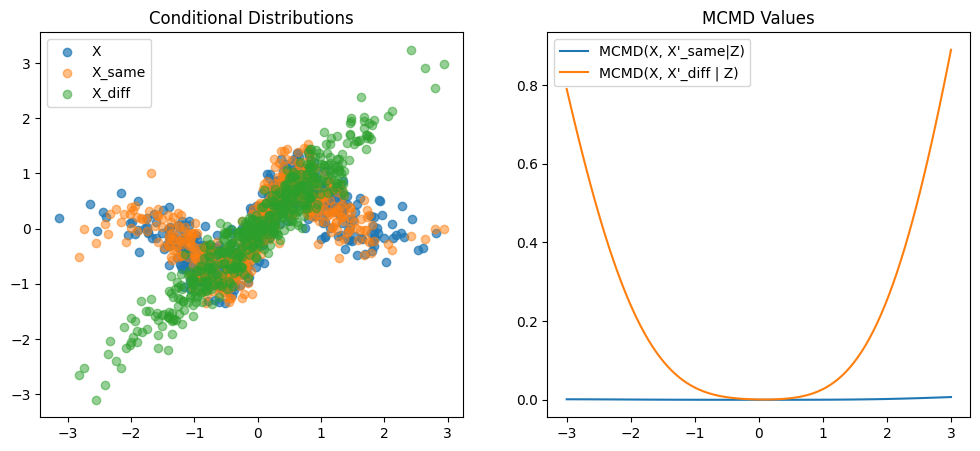

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))


axs[0].scatter(Z, X, label="X", alpha=0.7)
axs[0].scatter(Z_prime, X_same, label="X_same", alpha=0.5)
axs[0].scatter(Z_prime, X_diff, label="X_diff", alpha=0.5)
axs[0].set_title("Conditional Distributions")
axs[0].legend()

axs[1].plot(zvals, mcmd_same, label="MCMD(X, X'_same|Z)")
axs[1].plot(zvals, mcmd_diff, label="MCMD(X, X'_diff | Z)")
axs[1].set_title("MCMD Values")
axs[1].legend()


plt.show()

## Experiment 3: Heteroscedastic Variance

In [333]:
n = m = 500
#Z = np.random.normal(0, 1, size=n)
#Z_2 = np.random.normal(0, 1, size=m)
#Z_3 = np.random.normal(0, 1, size=m)
#Z_same = np.random.normal(0, 1, size=m)

Z = np.random.uniform(-3, 3, size=n)
Z_2 = np.random.uniform(-3, 3, size=n)
Z_3 = np.random.uniform(-3, 3, size=n)
Z_same = np.random.uniform(-3, 3, size=n)

In [334]:
X = np.exp(-0.5 * np.power(Z, 2)) * np.sin(2*Z) + 0.1 * np.random.normal(0, 1, size=n)

In [335]:
sigma_vals_2 = 0.5 * (1 + np.exp(-Z_2)) ** -1
eps = np.random.normal(np.zeros_like(sigma_vals_2), sigma_vals_2)

In [336]:
X_2 = np.exp(-0.5 * np.power(Z_2, 2)) * np.sin(2*Z_2) + eps

In [337]:
X_same = np.exp(-0.5 * np.power(Z_same, 2)) * np.sin(2*Z_same) + 0.1 * np.random.normal(0, 1, size=n)

In [338]:
sigma_vals_3 = 0.7 * (1 + np.exp(-Z_3)) ** -1
eps = np.random.normal(np.zeros_like(sigma_vals_3), sigma_vals_3)

In [339]:
X_3 = np.exp(-0.5 * np.power(Z_3, 2)) * np.sin(2*Z_3) + eps

In [340]:
# compute MCMD

In [341]:
lmbda = 1e-3
sig= 0.1
zvals = np.linspace(-3, 3, 100)

In [342]:
mcmd_x_prime = [conditional_mcmd(z=zval, X=X, Z=Z, Z_prime=Z_2, X_prime=X_2, lmbda=lmbda, sigma=sig) for zval in zvals]
mcmd_x_prime_prime = [conditional_mcmd(z=zval, X=X, Z=Z, Z_prime=Z_3, X_prime=X_3, lmbda=lmbda, sigma=sig) for zval in zvals]
mcmd_same = [conditional_mcmd(z=zval, X=X, Z=Z, Z_prime=Z_same, X_prime=X_same, lmbda=lmbda, sigma=sig) for zval in zvals]


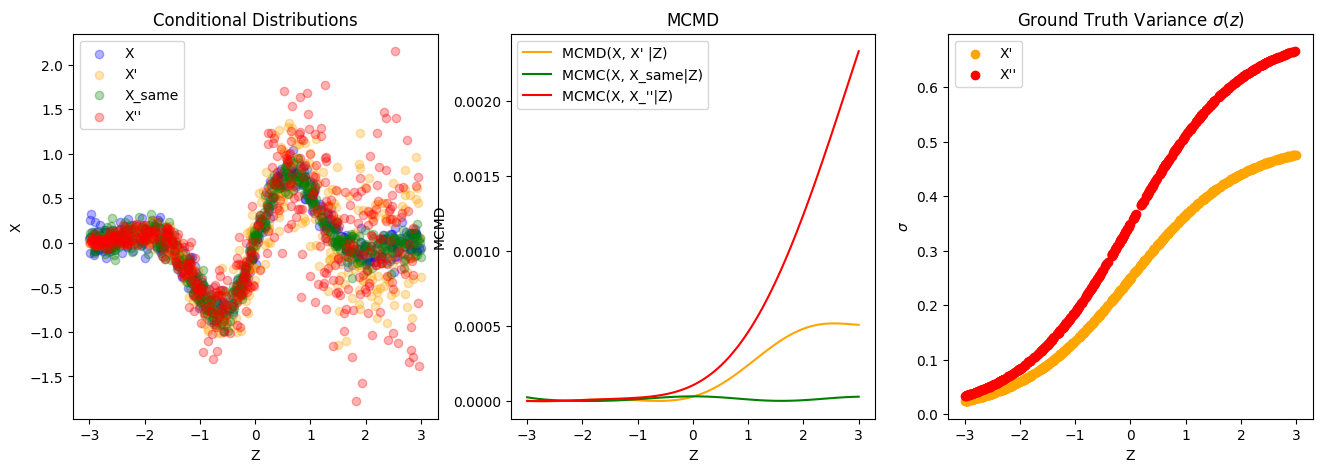

In [343]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

axs[0].scatter(Z, X, alpha=0.3, label='X', c='blue')
axs[0].scatter(Z_2, X_2, alpha=0.3, label="X'", c='orange')
axs[0].scatter(Z_same, X_same, alpha=0.3, label="X_same", c='green')
axs[0].scatter(Z_3, X_3, alpha=0.3, label="X''", c='red')
axs[0].set_title("Conditional Distributions")
axs[0].set_ylabel("X")
axs[0].set_xlabel("Z")
axs[0].legend()

axs[1].plot(zvals, mcmd_x_prime, label="MCMD(X, X' |Z)", c='orange')
axs[1].plot(zvals, mcmd_same, label='MCMC(X, X_same|Z)', c='green')
axs[1].plot(zvals, mcmd_x_prime_prime, label="MCMC(X, X_''|Z)", c='red')
axs[1].set_title("MCMD")
axs[1].set_xlabel("Z")
axs[1].set_ylabel("MCMD")
axs[1].legend()

axs[2].scatter(Z_2, sigma_vals_2, label="X'", c='orange')
axs[2].scatter(Z_3, sigma_vals_3, label="X''", c='red')
axs[2].set_title("Ground Truth Variance $\sigma(z)$")
axs[2].set_xlabel("Z")
axs[2].set_ylabel("$\sigma$")
axs[2].legend()

plt.show()

In [187]:
np.sum(mcmd_same)

0.006172230965353465

In [188]:
np.sum(mcmd_x_prime)

0.018919629597762944

In [189]:
np.sum(mcmd_x_prime_prime)

0.05995643928734706

In [190]:
np.mean(mcmd_same)

6.172230965353464e-05

In [191]:
np.mean(mcmd_x_prime)

0.00018919629597762943

In [192]:
np.mean(mcmd_x_prime_prime)

0.0005995643928734706

## Experiment 4: Heteroscedastic Variance + Different Means

In [322]:
n = m = 500

In [323]:
z = np.random.uniform(0, 2*np.pi, size=n)
x = np.random.normal(loc=np.cos(z), scale=0.5)

In [324]:
z_prime = np.random.uniform(0, 2*np.pi, size=m)
x_prime = np.random.normal(loc=(z_prime - 5), scale=0.5)

In [325]:
z_prime_prime = np.random.uniform(0, 2*np.pi, size=m)

In [326]:
sig_vals = z_prime_prime
eps = np.random.normal(np.zeros_like(sig_vals), sig_vals)

In [327]:
x_prime_prime = (z_prime_prime - 5) + eps

In [328]:
z3 = np.random.uniform(0, 2*np.pi, size=m)
x3 = np.random.normal(loc=5.0*np.cos(z3), scale=0.5)

In [329]:
zvals = np.linspace(0, 2*np.pi, 100)

In [330]:
mcmd_x_prime = [conditional_mcmd(z=zval, X=x, Z=z, Z_prime=z_prime, X_prime=x_prime, lmbda=lmbda, sigma=sig) for zval in zvals]
mcmd_x_prime_prime = [conditional_mcmd(z=zval, X=x, Z=z, Z_prime=z_prime_prime, X_prime=x_prime_prime, lmbda=lmbda, sigma=sig) for zval in zvals]
mcmd_x_3 = [conditional_mcmd(z=zval, X=x, Z=z, Z_prime=z3, X_prime=x3, lmbda=lmbda, sigma=sig) for zval in zvals]


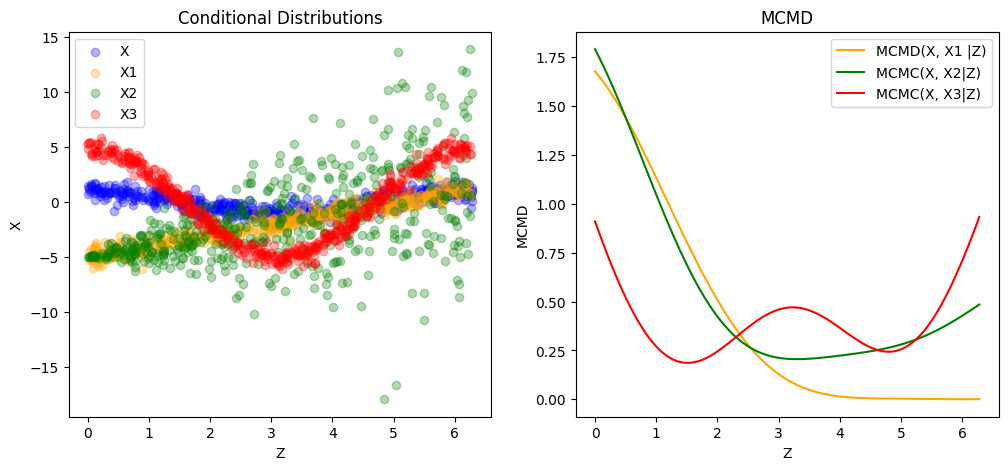

In [331]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(z, x, alpha=0.3, label='X', c='blue')
axs[0].scatter(z_prime, x_prime, alpha=0.3, label="X1", c='orange')
axs[0].scatter(z_prime_prime, x_prime_prime, alpha=0.3, label="X2", c='green')
axs[0].scatter(z3, x3, alpha=0.3, label="X3", c='red')

axs[0].set_title("Conditional Distributions")
axs[0].set_ylabel("X")
axs[0].set_xlabel("Z")
axs[0].legend()

axs[1].plot(zvals, mcmd_x_prime, label="MCMD(X, X1 |Z)", c='orange')
axs[1].plot(zvals, mcmd_x_prime_prime, label="MCMC(X, X2|Z)", c='green')
axs[1].plot(zvals, mcmd_x_3, label="MCMC(X, X3|Z)", c='red')

axs[1].set_title("MCMD")
axs[1].set_xlabel("Z")
axs[1].set_ylabel("MCMD")
axs[1].legend()